In [62]:
import pandas as pd
from pca import pca
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [63]:
df = pd.read_csv('parkinsons.data', sep=',').set_index('name')

In [64]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [65]:
X = df.drop(columns='status')
y = df['status'].map({0: 'Healthy', 1: "Parkinson's Disease"}).values
labels = df.drop(columns='status').columns

In [66]:
model = pca(normalize=True)

# for col in X.columns:
#     if all(X[col] > 0):
#         transformation, _ = boxcox(X[col])
#         X[col] = transformation
        
X = X.values

In [67]:
results = model.fit_transform(X, col_labels=labels, row_labels=y)

[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [22] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [22] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


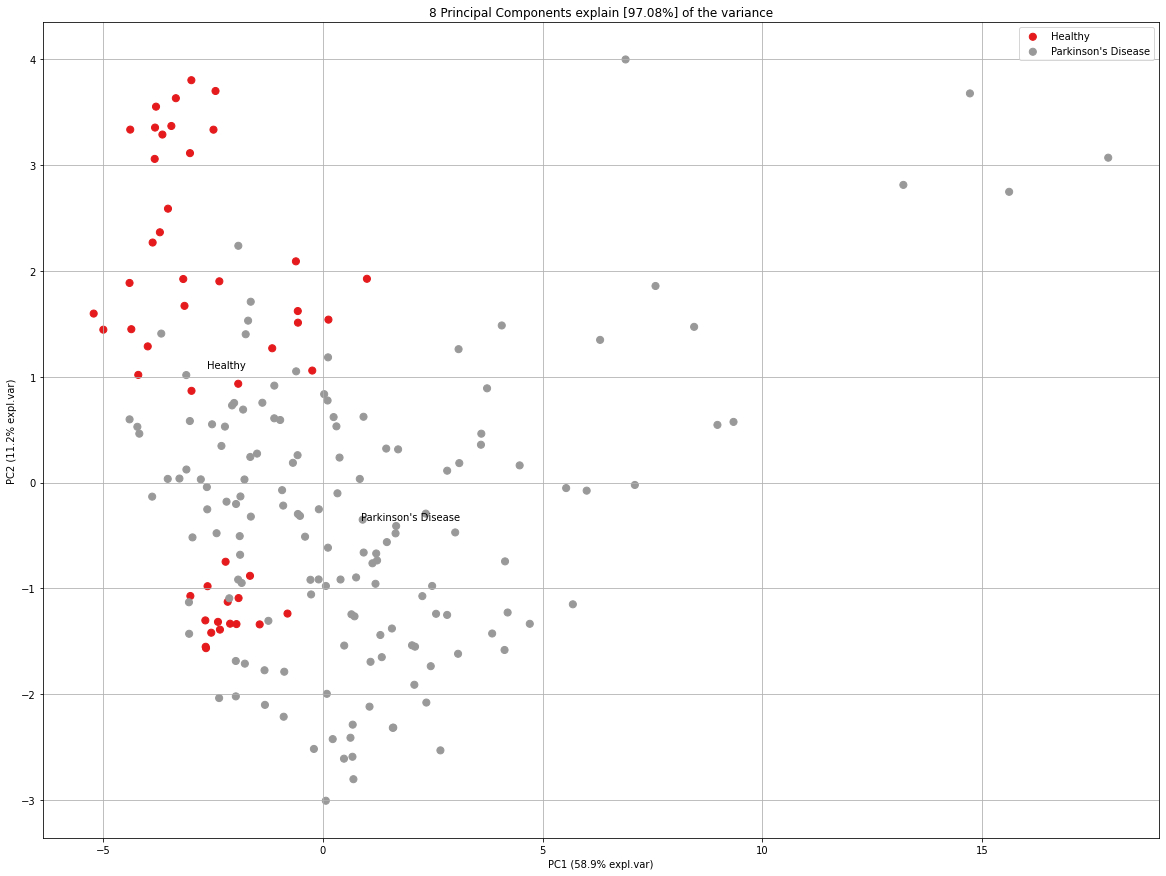

In [68]:
model.scatter()
plt.show()

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'8 Principal Components explain [97.08%] of the variance'}, xlabel='PC1 (58.9% expl.var)', ylabel='PC2 (11.2% expl.var)'>)

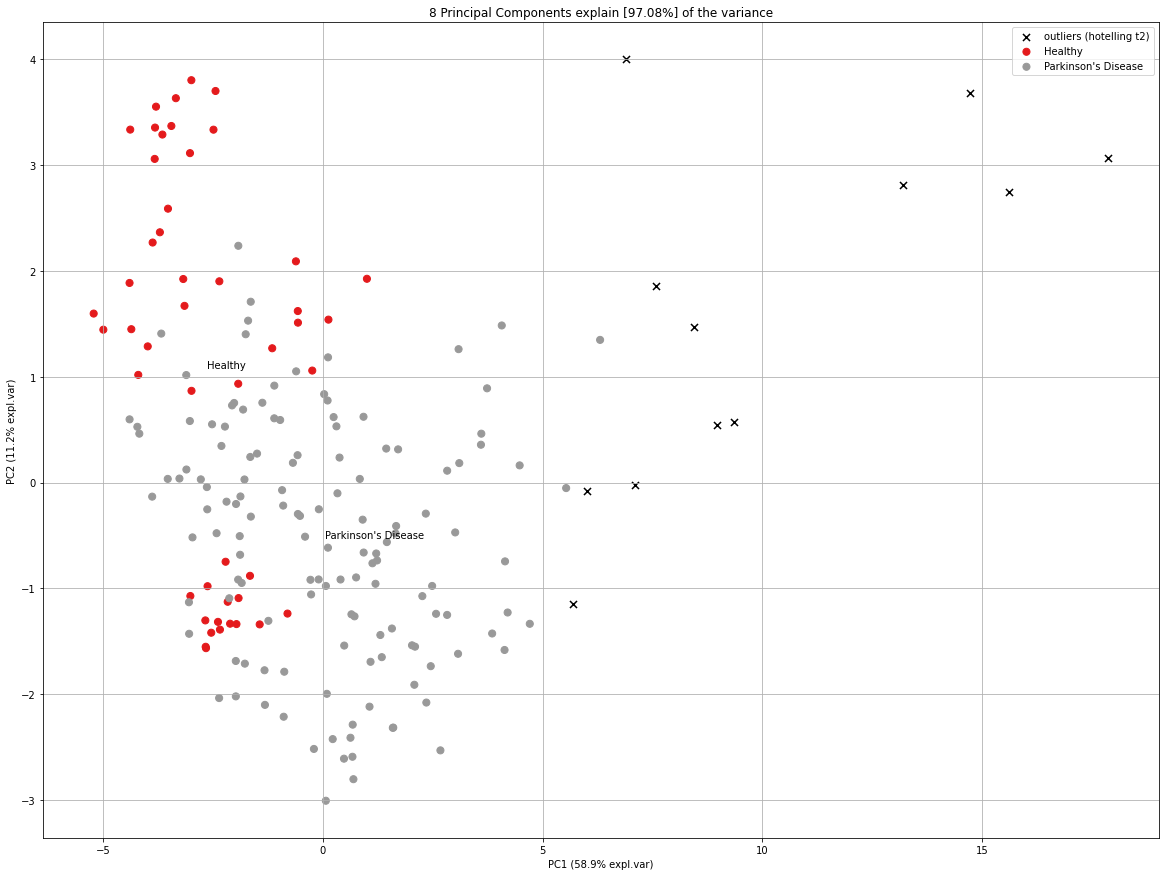

In [69]:
model.scatter(hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


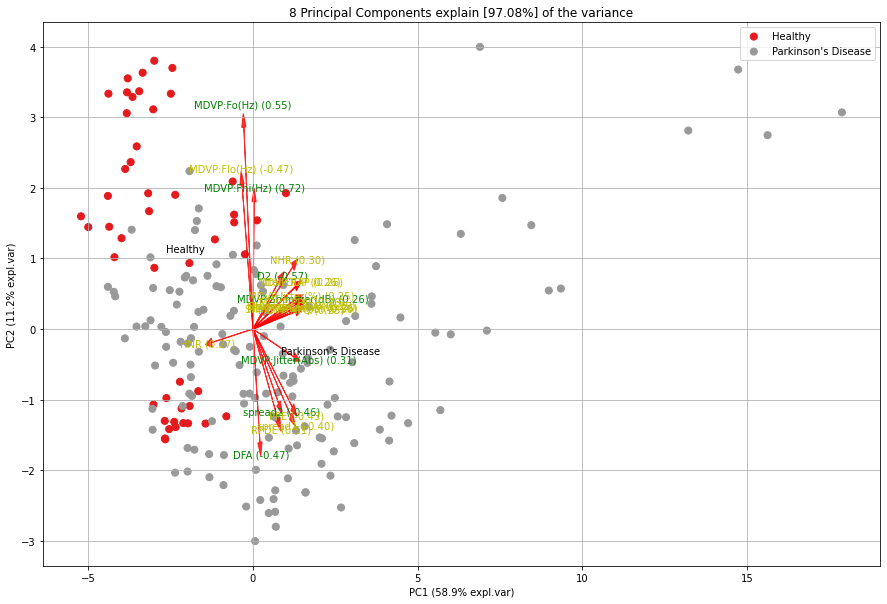

In [70]:
model.biplot()
plt.show()

In [71]:
labels

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

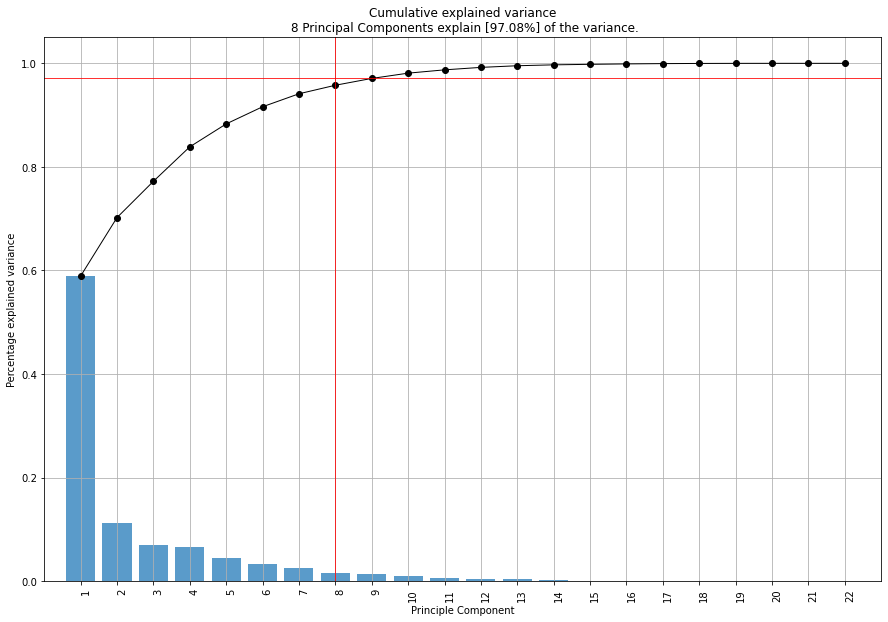

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 8 Principal Components explain [97.08%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [72]:
model.plot()

------

I hypothesize that it is not important to explain all variance. Healthy people are mostly clustered together and the variance is mostly caused by IDP patients.

---------

In [78]:
results['topfeat'].iloc[0:8]['feature'].values

array(['MDVP:Shimmer(dB)', 'MDVP:Fo(Hz)', 'DFA', 'MDVP:Jitter(Abs)',
       'spread2', 'MDVP:Fhi(Hz)', 'D2', 'spread2'], dtype=object)

In [74]:
results['loadings']

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
PC1,-0.053331,0.006713,-0.063819,0.254513,0.241681,0.249824,0.256530,0.249819,0.260000,0.261771,...,0.253638,0.253375,0.233908,-0.242058,0.146730,0.041013,0.223707,0.150741,0.154919,0.231062
PC2,0.553401,0.348782,0.395480,0.081789,-0.076773,0.116038,0.068102,0.116046,0.052556,0.076269,...,0.047763,0.058916,0.170538,-0.037070,-0.248595,-0.310782,-0.239310,-0.204218,0.132811,-0.213951
PC3,0.128288,0.267643,-0.232845,-0.150674,-0.185290,-0.169213,-0.178925,-0.169246,-0.015293,-0.034916,...,0.021475,-0.035590,-0.043522,-0.162051,0.352672,-0.465806,0.152188,0.349193,0.428113,0.091611
PC4,-0.131228,0.240990,-0.220075,0.251695,0.308117,0.257620,0.156559,0.257656,-0.242093,-0.207415,...,-0.234246,-0.239905,0.274431,0.085331,0.069623,-0.287411,0.091672,-0.091809,-0.088503,0.043262
PC5,-0.115095,-0.187710,-0.285826,-0.071115,0.000854,-0.025829,-0.141655,-0.025822,0.132790,0.076654,...,0.021676,0.198360,0.101693,-0.159496,0.345191,-0.390668,-0.226460,-0.460118,-0.307746,-0.267361
PC6,-0.147669,0.719036,-0.467681,-0.041669,-0.039272,-0.077371,-0.002573,-0.077414,0.098616,0.111733,...,0.030262,0.117029,-0.091129,0.096964,-0.255334,0.231449,-0.073202,-0.084695,-0.122772,-0.043891
PC7,-0.003506,0.369741,0.455281,-0.021401,0.004741,-0.045633,0.053369,-0.045645,0.006038,0.012256,...,0.050045,-0.008381,-0.087203,0.034475,0.511130,0.035041,0.060150,0.183842,-0.572851,0.091546
PC8,-0.216748,-0.054245,0.007371,0.032195,0.088530,0.034029,-0.086874,0.034043,0.055277,0.058426,...,0.010786,0.080836,0.295977,0.270806,-0.030547,-0.048590,-0.403102,0.629063,-0.011334,-0.433545
